In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [117]:
df=pd.read_csv(r"C:\Users\USER\Downloads\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [118]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [119]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [120]:
df.groupby("Species").sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1275,250.3,170.9,73.2,12.2
Iris-versicolor,3775,296.8,138.5,213.0,66.3
Iris-virginica,6275,329.4,148.7,277.6,101.3


In [121]:
df['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1,'Iris-virginica':2}, inplace=True)

In [122]:
x=df.drop(["Id","Species"],axis=1)
y=df["Species"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

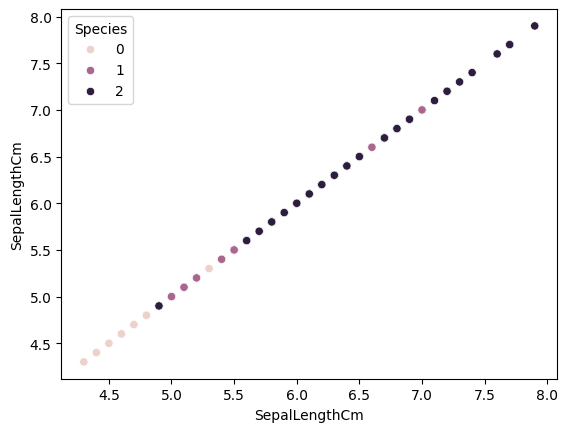

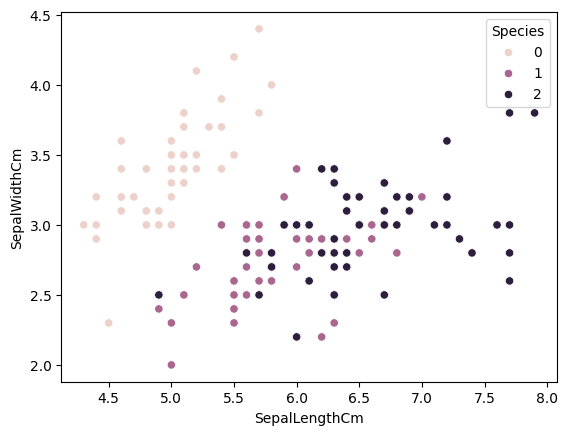

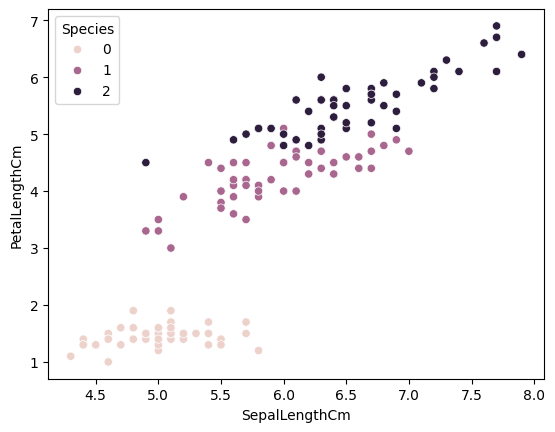

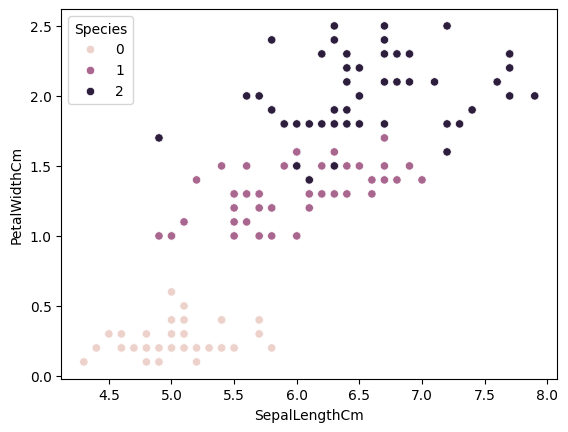

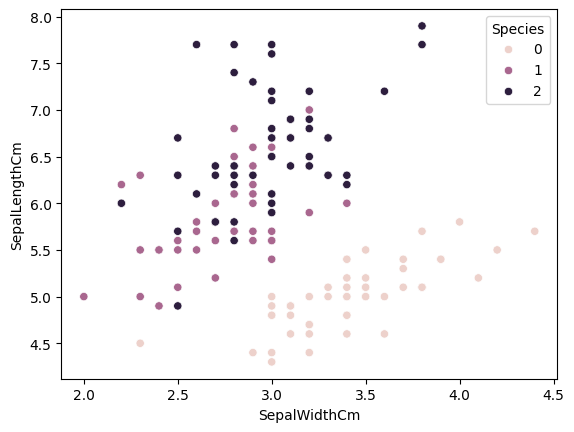

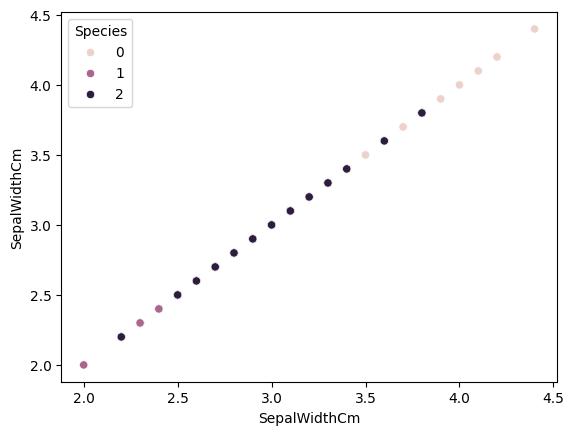

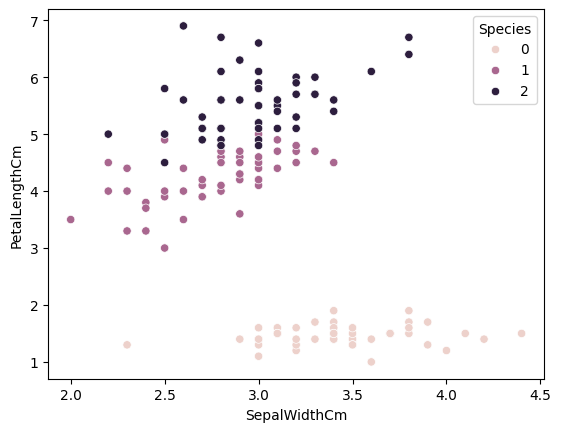

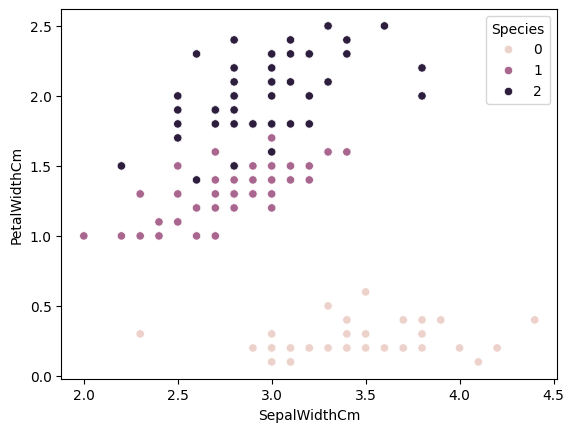

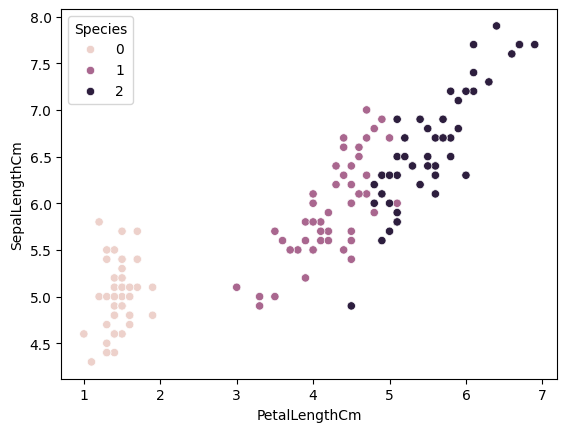

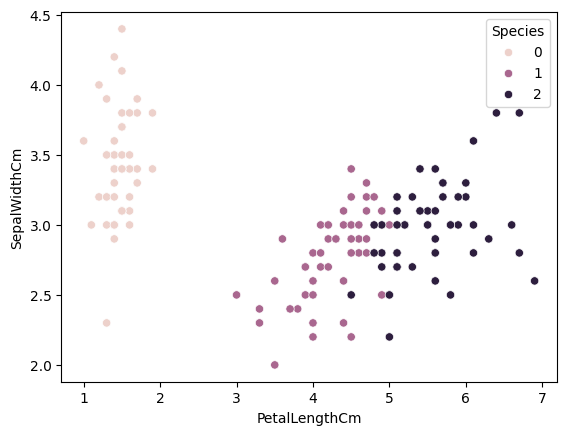

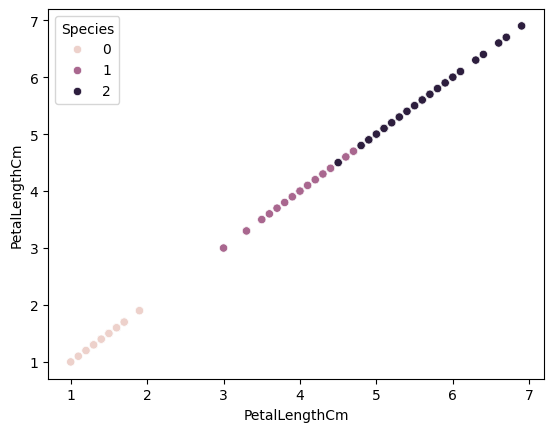

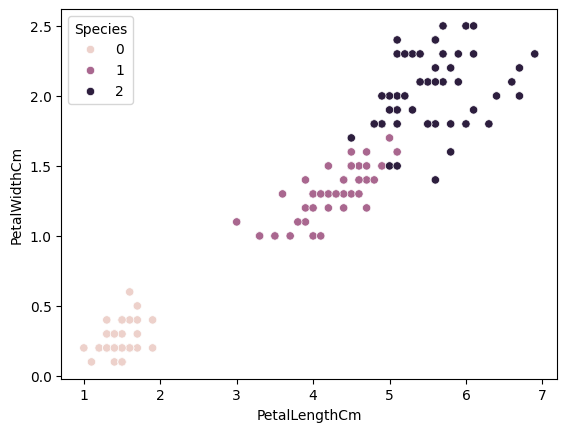

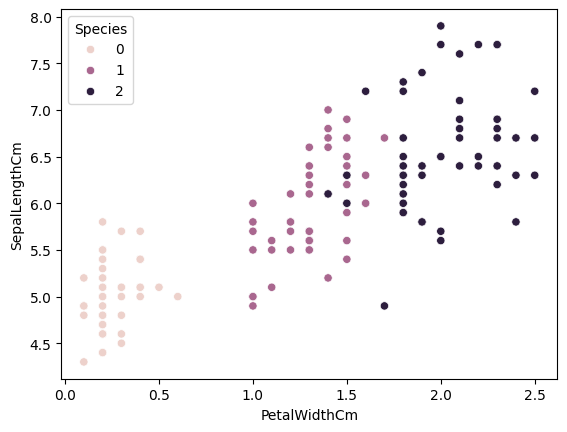

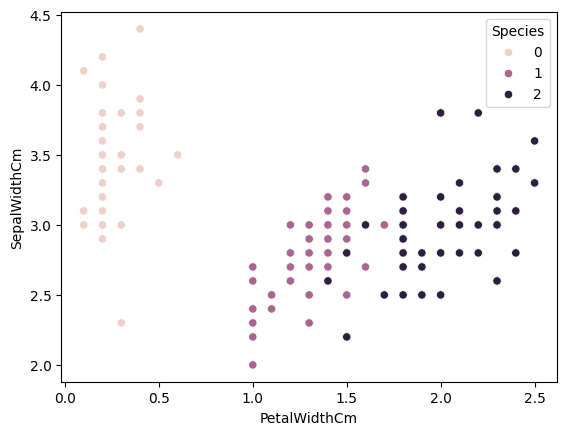

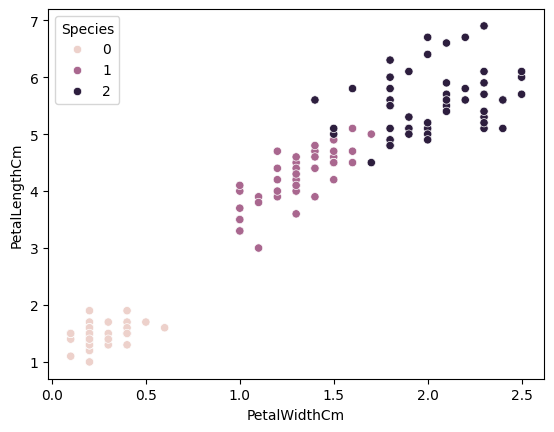

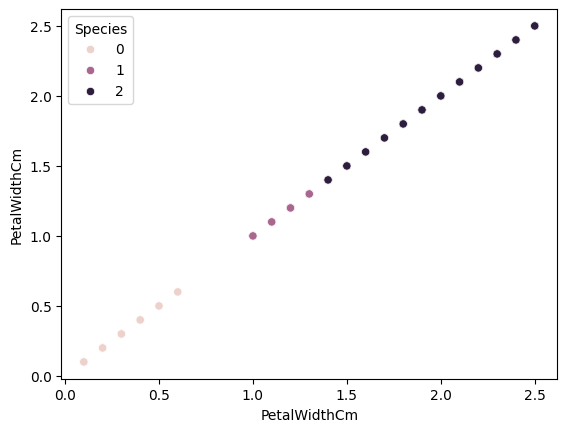

In [123]:
for i in x.columns:
    for j in x.columns:
        sns.scatterplot(x=x[i], y=x[j], hue='Species', data=df)
        plt.show()

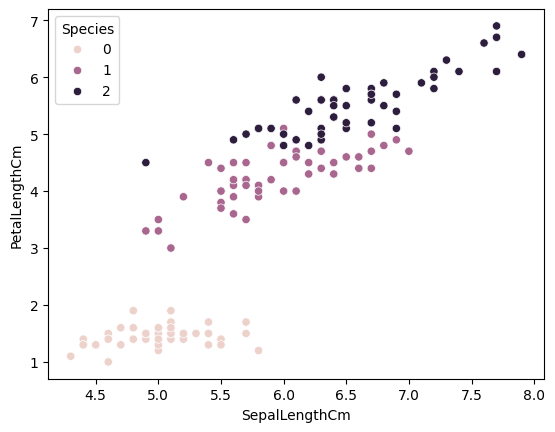

In [124]:
sns.scatterplot(x=x["SepalLengthCm"], y=x["PetalLengthCm"], hue='Species', data=df)
plt.show()

C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


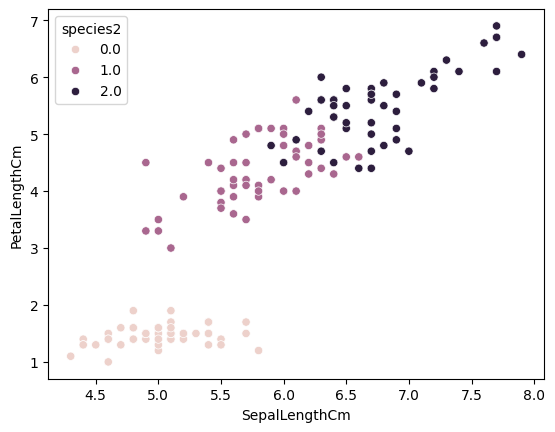

In [125]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
species2=kmeans.labels_
df2= pd.DataFrame(np.hstack((df[["SepalLengthCm","PetalLengthCm"]], species2.reshape(-1, 1))) ,columns=["SepalLengthCm","PetalLengthCm","species2"])
sns.scatterplot(x=x["SepalLengthCm"], y=x["PetalLengthCm"], hue='species2', data=df2)
plt.show()

In [126]:
diference=pd.DataFrame({"actualle":df["Species"].values,"predicted":species2})
diference

,actualle,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,1
147,2,2
148,2,2


Text(0.5, 1.0, 'the actualle')

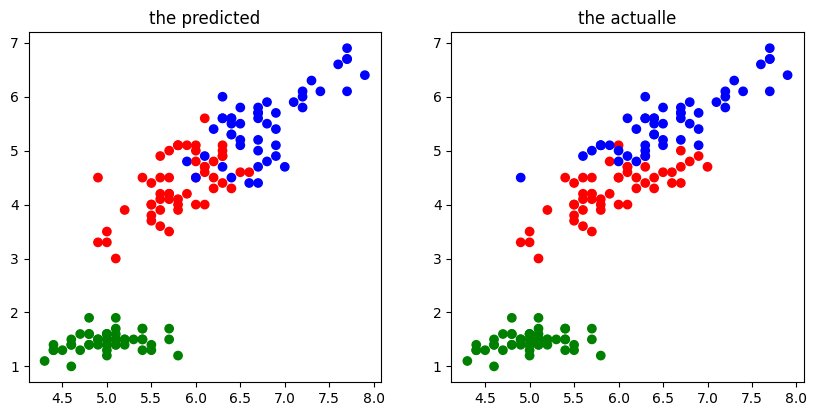

In [127]:
colorL=np.array(['green','red','blue'])
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(x["SepalLengthCm"],x["PetalLengthCm"],c=colorL[species2])
ax1.set_title('the predicted')

    # Add the second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(x["SepalLengthCm"],x["PetalLengthCm"],c=colorL[df.Species])
ax2.set_title('the actualle')